# Statistics Crash Course for Data Science Interviews

**Date:** 20 January 2026

This notebook covers essential statistics concepts commonly tested in data science interviews and technical assessments. Each section includes explanations, code examples, and practice questions.

## Table of Contents
1. [Descriptive Statistics](#1-descriptive-statistics)
2. [Probability Basics](#2-probability-basics)
3. [Probability Distributions](#3-probability-distributions)
4. [Central Limit Theorem](#4-central-limit-theorem)
5. [Confidence Intervals](#5-confidence-intervals)
6. [Hypothesis Testing](#6-hypothesis-testing)
7. [Correlation and Covariance](#7-correlation-and-covariance)
8. [A/B Testing Basics](#8-ab-testing-basics)
9. [Sampling Methods](#9-sampling-methods)
10. [Common Statistical Pitfalls](#10-common-statistical-pitfalls)
11. [Practice Questions](#11-practice-questions)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

---
## 1. Descriptive Statistics

Descriptive statistics summarise and describe the main features of a dataset. They provide simple summaries about the sample and the measures.

### Measures of Central Tendency

- **Mean**: The arithmetic average of all values
- **Median**: The middle value when data is sorted
- **Mode**: The most frequently occurring value

### Measures of Dispersion

- **Variance**: The average of squared deviations from the mean
- **Standard Deviation**: The square root of variance (same units as data)
- **Range**: Difference between maximum and minimum values
- **Interquartile Range (IQR)**: Range between 25th and 75th percentiles

In [2]:
def calculate_descriptive_stats(data: np.ndarray) -> dict:
    """Calculate comprehensive descriptive statistics for a dataset.
    
    Args:
        data: A numpy array of numerical values.
        
    Returns:
        A dictionary containing all descriptive statistics.
    """
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'mode': stats.mode(data, keepdims=True).mode[0],
        'variance': np.var(data, ddof=1),
        'std_dev': np.std(data, ddof=1),
        'range': np.ptp(data),
        'iqr': stats.iqr(data),
        'skewness': stats.skew(data),
        'kurtosis': stats.kurtosis(data)
    }


sample_data = np.array([12, 15, 18, 22, 22, 25, 28, 30, 35, 40])
desc_stats = calculate_descriptive_stats(sample_data)

print("Sample Data:", sample_data)
print("\nDescriptive Statistics:")
for stat, value in desc_stats.items():
    print(f"  {stat.replace('_', ' ').title()}: {value:.4f}")

Sample Data: [12 15 18 22 22 25 28 30 35 40]

Descriptive Statistics:
  Mean: 24.7000
  Median: 23.5000
  Mode: 22.0000
  Variance: 77.1222
  Std Dev: 8.7819
  Range: 28.0000
  Iqr: 10.5000
  Skewness: 0.2694
  Kurtosis: -0.8424


### When to Use Each Measure

| Measure | Best Used When | Sensitive To |
|---------|---------------|---------------|
| Mean | Data is symmetric, no outliers | Outliers |
| Median | Data is skewed or has outliers | Not sensitive to outliers |
| Mode | Categorical data or finding most common value | N/A |
| Std Dev | Understanding spread around the mean | Outliers |
| IQR | Robust measure of spread | Not sensitive to outliers |

---
## 2. Probability Basics

Probability measures the likelihood of an event occurring, ranging from 0 (impossible) to 1 (certain).

### Key Concepts

- **Sample Space (S)**: Set of all possible outcomes
- **Event (E)**: A subset of the sample space
- **P(E)**: Probability of event E occurring

### Probability Rules

1. **Addition Rule**: P(A or B) = P(A) + P(B) - P(A and B)
2. **Multiplication Rule**: P(A and B) = P(A) * P(B|A)
3. **Complement Rule**: P(not A) = 1 - P(A)

### Conditional Probability

The probability of event A given that event B has occurred:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

In [3]:
def conditional_probability(p_a_and_b: float, p_b: float) -> float:
    """Calculate conditional probability P(A|B).
    
    Args:
        p_a_and_b: Probability of both A and B occurring.
        p_b: Probability of B occurring.
        
    Returns:
        The conditional probability P(A|B).
        
    Raises:
        ValueError: If p_b is zero.
    """
    if p_b == 0:
        raise ValueError("P(B) cannot be zero")
    return p_a_and_b / p_b


p_rain = 0.3
p_traffic_given_rain = 0.7
p_rain_and_traffic = p_rain * p_traffic_given_rain

print(f"P(Rain) = {p_rain}")
print(f"P(Traffic | Rain) = {p_traffic_given_rain}")
print(f"P(Rain and Traffic) = {p_rain_and_traffic}")

P(Rain) = 0.3
P(Traffic | Rain) = 0.7
P(Rain and Traffic) = 0.21


### Bayes' Theorem

Bayes' theorem describes the probability of an event based on prior knowledge of conditions related to the event:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**Example**: Medical diagnosis
- A test for a disease is 99% accurate
- The disease affects 1% of the population
- What is the probability you have the disease if you test positive?

In [4]:
def bayes_theorem(
    p_b_given_a: float,
    p_a: float,
    p_b: float
) -> float:
    """Calculate P(A|B) using Bayes' theorem.
    
    Args:
        p_b_given_a: Probability of B given A (likelihood).
        p_a: Prior probability of A.
        p_b: Marginal probability of B (evidence).
        
    Returns:
        Posterior probability P(A|B).
    """
    return (p_b_given_a * p_a) / p_b


p_disease = 0.01
p_positive_given_disease = 0.99
p_positive_given_no_disease = 0.01

p_positive = (p_positive_given_disease * p_disease + 
              p_positive_given_no_disease * (1 - p_disease))

p_disease_given_positive = bayes_theorem(
    p_positive_given_disease, 
    p_disease, 
    p_positive
)

print(f"Prior P(Disease) = {p_disease:.2%}")
print(f"P(Positive Test) = {p_positive:.4f}")
print(f"P(Disease | Positive Test) = {p_disease_given_positive:.2%}")
print("\nNote: Even with a 99% accurate test, only ~50% of positive tests indicate disease!")

Prior P(Disease) = 1.00%
P(Positive Test) = 0.0198
P(Disease | Positive Test) = 50.00%

Note: Even with a 99% accurate test, only ~50% of positive tests indicate disease!


---
## 3. Probability Distributions

A probability distribution describes how the values of a random variable are distributed.

### Discrete Distributions

#### Binomial Distribution
Models the number of successes in n independent Bernoulli trials.

- **Parameters**: n (trials), p (probability of success)
- **Mean**: np
- **Variance**: np(1-p)

Binomial Distribution (n=10, p=0.3)
Mean: 3.00
Variance: 2.10
P(X = 3): 0.2668
P(X <= 3): 0.6496


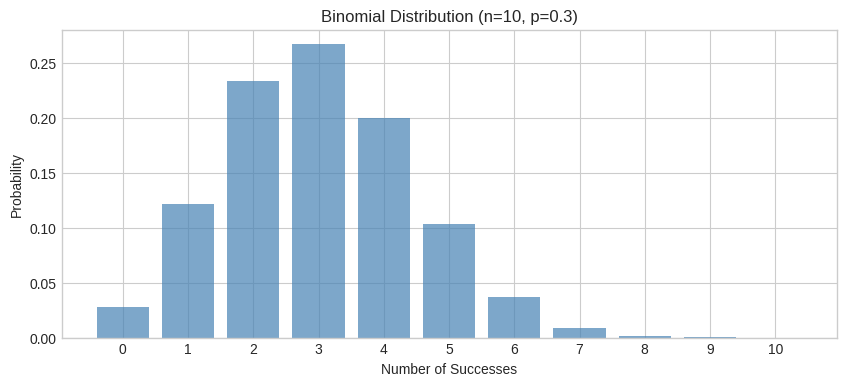

In [5]:
n_trials = 10
p_success = 0.3

binomial_dist = stats.binom(n=n_trials, p=p_success)

print(f"Binomial Distribution (n={n_trials}, p={p_success})")
print(f"Mean: {binomial_dist.mean():.2f}")
print(f"Variance: {binomial_dist.var():.2f}")
print(f"P(X = 3): {binomial_dist.pmf(3):.4f}")  # type: ignore[union-attr]
print(f"P(X <= 3): {binomial_dist.cdf(3):.4f}")

x = np.arange(0, n_trials + 1)
plt.figure(figsize=(10, 4))
plt.bar(x, binomial_dist.pmf(x), color='steelblue', alpha=0.7)  # type: ignore[union-attr]
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n_trials}, p={p_success})')
plt.xticks(x)
plt.show()

#### Poisson Distribution
Models the number of events occurring in a fixed interval of time/space.

- **Parameter**: λ (lambda) - average rate of occurrence
- **Mean**: λ
- **Variance**: λ

Poisson Distribution (λ=4)
Mean: 4.00
Variance: 4.00
P(X = 5): 0.1563


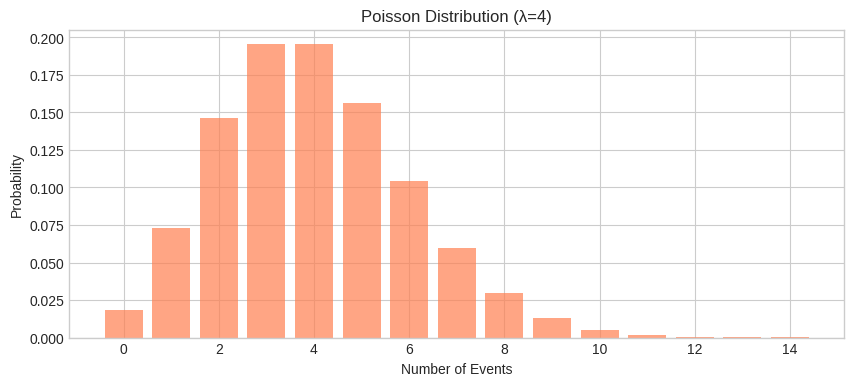

In [6]:
lambda_rate = 4

poisson_dist = stats.poisson(mu=lambda_rate)

print(f"Poisson Distribution (λ={lambda_rate})")
print(f"Mean: {poisson_dist.mean():.2f}")
print(f"Variance: {poisson_dist.var():.2f}")
print(f"P(X = 5): {poisson_dist.pmf(5):.4f}")  # type: ignore[union-attr]

x = np.arange(0, 15)
plt.figure(figsize=(10, 4))
plt.bar(x, poisson_dist.pmf(x), color='coral', alpha=0.7)  # type: ignore[union-attr]
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (λ={lambda_rate})')
plt.show()

### Continuous Distributions

#### Normal (Gaussian) Distribution
The most important distribution in statistics - the "bell curve".

- **Parameters**: μ (mean), σ (standard deviation)
- **68-95-99.7 Rule**: 68% within 1σ, 95% within 2σ, 99.7% within 3σ

Normal Distribution (μ=100, σ=15)
P(X < 115): 0.8413
P(85 < X < 115): 0.6827
Value at 95th percentile: 124.67


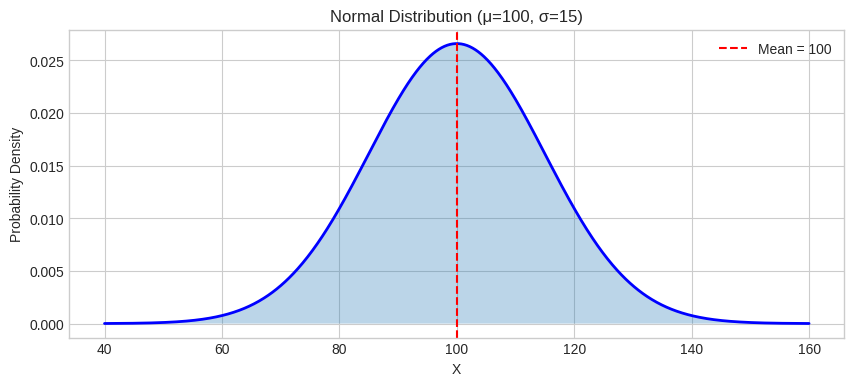

In [7]:
mu, sigma = 100, 15

normal_dist = stats.norm(loc=mu, scale=sigma)

print(f"Normal Distribution (μ={mu}, σ={sigma})")
print(f"P(X < 115): {normal_dist.cdf(115):.4f}")
print(f"P(85 < X < 115): {normal_dist.cdf(115) - normal_dist.cdf(85):.4f}")
print(f"Value at 95th percentile: {normal_dist.ppf(0.95):.2f}")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.figure(figsize=(10, 4))
plt.plot(x, normal_dist.pdf(x), 'b-', linewidth=2)  # type: ignore[union-attr]
plt.fill_between(x, normal_dist.pdf(x), alpha=0.3)  # type: ignore[union-attr]
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution (μ={mu}, σ={sigma})')
plt.legend()
plt.show()

#### Uniform Distribution
All outcomes are equally likely within a given range.

- **Parameters**: a (minimum), b (maximum)
- **Mean**: (a + b) / 2
- **Variance**: (b - a)² / 12

In [8]:
a, b = 0, 10

uniform_dist = stats.uniform(loc=a, scale=b-a)

print(f"Uniform Distribution (a={a}, b={b})")
print(f"Mean: {uniform_dist.mean():.2f}")
print(f"Variance: {uniform_dist.var():.2f}")
print(f"P(2 < X < 7): {uniform_dist.cdf(7) - uniform_dist.cdf(2):.4f}")

Uniform Distribution (a=0, b=10)
Mean: 5.00
Variance: 8.33
P(2 < X < 7): 0.5000


---
## 4. Central Limit Theorem

The **Central Limit Theorem (CLT)** states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the population's distribution.

**Key Points:**
- Works for any population distribution (with finite variance)
- Sample size n ≥ 30 is generally sufficient
- Mean of sample means = Population mean (μ)
- Standard error = σ / √n

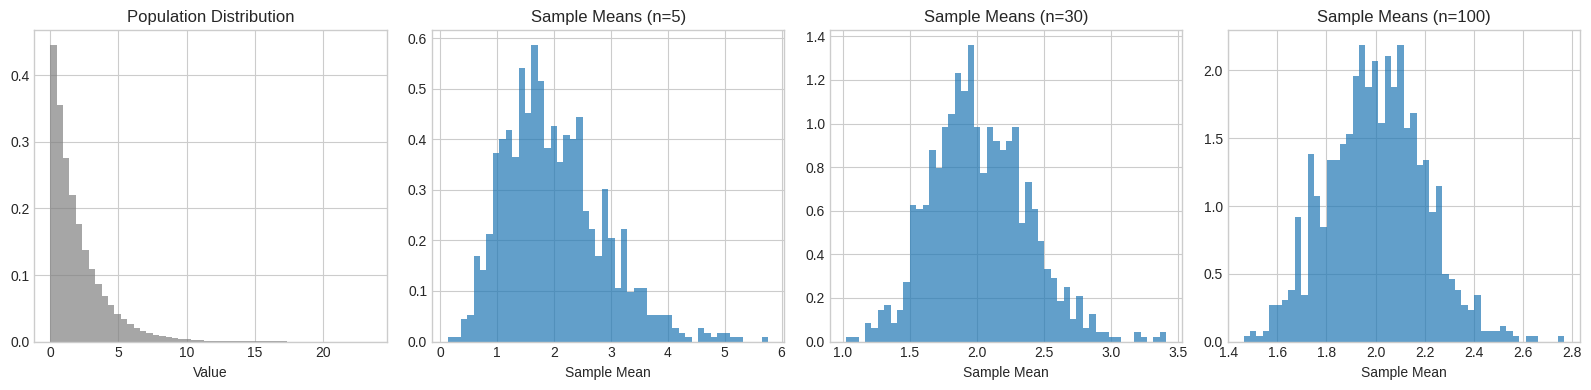

In [9]:
def demonstrate_clt(
    population: np.ndarray,
    sample_sizes: list[int],
    n_samples: int = 1000
) -> None:
    """Demonstrate the Central Limit Theorem visually.
    
    Args:
        population: The population to sample from.
        sample_sizes: List of different sample sizes to demonstrate.
        n_samples: Number of samples to draw for each sample size.
    """
    fig, axes = plt.subplots(1, len(sample_sizes) + 1, figsize=(16, 4))
    
    axes[0].hist(population, bins=50, density=True, alpha=0.7, color='gray')
    axes[0].set_title('Population Distribution')
    axes[0].set_xlabel('Value')
    
    for idx, n in enumerate(sample_sizes):
        sample_means = [np.mean(np.random.choice(population, size=n)) 
                        for _ in range(n_samples)]
        
        axes[idx + 1].hist(sample_means, bins=50, density=True, alpha=0.7)
        axes[idx + 1].set_title(f'Sample Means (n={n})')
        axes[idx + 1].set_xlabel('Sample Mean')
    
    plt.tight_layout()
    plt.show()


exponential_population = np.random.exponential(scale=2, size=100000)
demonstrate_clt(exponential_population, [5, 30, 100])

---
## 5. Confidence Intervals

A **confidence interval** provides a range of values that likely contains the true population parameter.

**Formula for mean (when σ is known):**
$$\bar{x} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$$

**Formula for mean (when σ is unknown, use t-distribution):**
$$\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

In [10]:
def confidence_interval_mean(
    data: np.ndarray,
    confidence: float = 0.95
) -> tuple[float, float, float]:
    """Calculate confidence interval for the mean using t-distribution.
    
    Args:
        data: Sample data array.
        confidence: Confidence level (default 0.95 for 95% CI).
        
    Returns:
        Tuple of (sample_mean, lower_bound, upper_bound).
    """
    n = len(data)
    mean = float(np.mean(data))
    se = stats.sem(data)
    
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_critical * se
    
    return mean, mean - margin_of_error, mean + margin_of_error


sample = np.random.normal(loc=50, scale=10, size=100)
mean, ci_lower, ci_upper = confidence_interval_mean(sample, confidence=0.95)

print(f"Sample Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

ci_result = stats.t.interval(0.95, df=len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))
print(f"Using scipy.stats: ({ci_result[0]:.2f}, {ci_result[1]:.2f})")

Sample Mean: 49.65
95% Confidence Interval: (47.72, 51.58)
Using scipy.stats: (47.72, 51.58)


---
## 6. Hypothesis Testing

Hypothesis testing is a method for making statistical decisions using experimental data.

### Key Concepts

- **Null Hypothesis (H₀)**: The default assumption (no effect/difference)
- **Alternative Hypothesis (H₁)**: What we want to prove
- **p-value**: Probability of observing results at least as extreme as the data, assuming H₀ is true
- **Significance Level (α)**: Threshold for rejecting H₀ (typically 0.05)

### Types of Errors

| | H₀ True | H₀ False |
|---|---------|----------|
| Reject H₀ | Type I Error (α) | Correct |
| Fail to Reject H₀ | Correct | Type II Error (β) |

### One-Sample t-test

Tests whether the mean of a sample differs from a known value.

In [11]:
def one_sample_ttest(
    sample: np.ndarray,
    population_mean: float,
    alpha: float = 0.05
) -> dict:
    """Perform a one-sample t-test.
    
    Args:
        sample: Sample data array.
        population_mean: Hypothesised population mean.
        alpha: Significance level.
        
    Returns:
        Dictionary with test results.
    """
    result = stats.ttest_1samp(sample, population_mean)
    t_stat = float(result[0])  # type: ignore[arg-type]
    p_value = float(result[1])  # type: ignore[arg-type]
    
    return {
        't_statistic': t_stat,
        'p_value': p_value,
        'reject_null': p_value < alpha,
        'alpha': alpha
    }


sample_scores = np.random.normal(loc=72, scale=8, size=50)
result = one_sample_ttest(sample_scores, population_mean=70)

print("One-Sample t-test: Is the mean different from 70?")
print(f"t-statistic: {result['t_statistic']:.4f}")
print(f"p-value: {result['p_value']:.4f}")
print(f"Reject H₀ at α=0.05: {result['reject_null']}")

One-Sample t-test: Is the mean different from 70?
t-statistic: 0.6790
p-value: 0.5003
Reject H₀ at α=0.05: False


### Two-Sample t-test

Tests whether the means of two independent samples are different.

In [12]:
def two_sample_ttest(
    sample1: np.ndarray,
    sample2: np.ndarray,
    equal_var: bool = False,
    alpha: float = 0.05
) -> dict:
    """Perform a two-sample t-test (Welch's t-test by default).
    
    Args:
        sample1: First sample data array.
        sample2: Second sample data array.
        equal_var: Assume equal variances (False for Welch's test).
        alpha: Significance level.
        
    Returns:
        Dictionary with test results.
    """
    result = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
    t_stat = float(result[0])  # type: ignore[arg-type]
    p_value = float(result[1])  # type: ignore[arg-type]
    
    return {
        't_statistic': t_stat,
        'p_value': p_value,
        'reject_null': p_value < alpha,
        'mean_diff': float(np.mean(sample1) - np.mean(sample2))
    }


group_a = np.random.normal(loc=50, scale=10, size=40)
group_b = np.random.normal(loc=55, scale=12, size=45)

result = two_sample_ttest(group_a, group_b)
print("Two-Sample t-test: Are the group means different?")
print(f"Mean difference: {result['mean_diff']:.2f}")
print(f"t-statistic: {result['t_statistic']:.4f}")
print(f"p-value: {result['p_value']:.4f}")
print(f"Reject H₀ at α=0.05: {result['reject_null']}")

Two-Sample t-test: Are the group means different?
Mean difference: -0.33
t-statistic: -0.1312
p-value: 0.8959
Reject H₀ at α=0.05: False


### Chi-Square Test

Tests the independence of two categorical variables or goodness of fit.

In [13]:
def chi_square_independence(
    contingency_table: np.ndarray,
    alpha: float = 0.05
) -> dict:
    """Perform chi-square test of independence.
    
    Args:
        contingency_table: 2D array of observed frequencies.
        alpha: Significance level.
        
    Returns:
        Dictionary with test results.
    """
    result = stats.chi2_contingency(contingency_table)
    chi2 = float(result[0])  # type: ignore[arg-type]
    p_value = float(result[1])  # type: ignore[arg-type]
    dof = int(result[2])  # type: ignore[arg-type]
    expected = result[3]
    
    return {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'expected_frequencies': expected,
        'reject_null': p_value < alpha
    }


observed = np.array([[50, 30], [20, 40]])
result = chi_square_independence(observed)

print("Chi-Square Test of Independence")
print(f"Observed:\n{observed}")
print(f"\nExpected:\n{result['expected_frequencies'].round(2)}")
print(f"\nChi² statistic: {result['chi2_statistic']:.4f}")
print(f"p-value: {result['p_value']:.4f}")
print(f"Reject H₀ (variables are independent): {result['reject_null']}")

Chi-Square Test of Independence
Observed:
[[50 30]
 [20 40]]

Expected:
[[40. 40.]
 [30. 30.]]

Chi² statistic: 10.5292
p-value: 0.0012
Reject H₀ (variables are independent): True


---
## 7. Correlation and Covariance

### Covariance
Measures how two variables change together. Units depend on the variables.

$$Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

### Correlation (Pearson's r)
Standardised measure of linear relationship (-1 to +1).

$$r = \frac{Cov(X, Y)}{\sigma_X \cdot \sigma_Y}$$

Correlation Analysis
Covariance: 159.0463
Pearson r: 0.9655 (p-value: 4.54e-59)
Spearman r: 0.9640 (p-value: 3.35e-58)


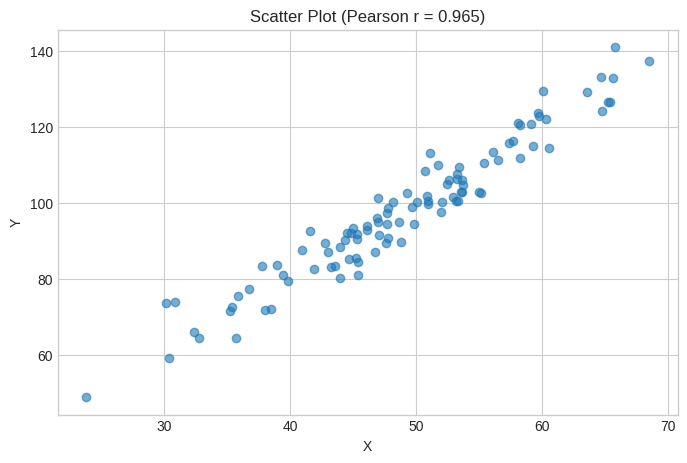

In [14]:
def correlation_analysis(
    x: np.ndarray,
    y: np.ndarray
) -> dict:
    """Perform comprehensive correlation analysis.
    
    Args:
        x: First variable array.
        y: Second variable array.
        
    Returns:
        Dictionary with correlation metrics and test results.
    """
    pearson_r, pearson_p = stats.pearsonr(x, y)
    spearman_r, spearman_p = stats.spearmanr(x, y)
    covariance = np.cov(x, y)[0, 1]
    
    return {
        'covariance': covariance,
        'pearson_r': pearson_r,
        'pearson_p_value': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p_value': spearman_p
    }


np.random.seed(42)
x = np.random.normal(50, 10, 100)
y = 2 * x + np.random.normal(0, 5, 100)

result = correlation_analysis(x, y)

print("Correlation Analysis")
print(f"Covariance: {result['covariance']:.4f}")
print(f"Pearson r: {result['pearson_r']:.4f} (p-value: {result['pearson_p_value']:.2e})")
print(f"Spearman r: {result['spearman_r']:.4f} (p-value: {result['spearman_p_value']:.2e})")

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Scatter Plot (Pearson r = {result["pearson_r"]:.3f})')
plt.show()

### Correlation Interpretation

| r value | Interpretation |
|---------|----------------|
| 0.9 to 1.0 | Very strong positive |
| 0.7 to 0.9 | Strong positive |
| 0.4 to 0.7 | Moderate positive |
| 0.1 to 0.4 | Weak positive |
| -0.1 to 0.1 | No correlation |

**Important**: Correlation does NOT imply causation!

---
## 8. A/B Testing Basics

A/B testing is a method of comparing two versions to determine which performs better.

### Key Components

1. **Control Group (A)**: The current/baseline version
2. **Treatment Group (B)**: The new version being tested
3. **Metric**: What you're measuring (conversion rate, click-through rate, etc.)
4. **Sample Size**: Number of observations needed for statistical power

In [15]:
def calculate_sample_size(
    baseline_rate: float,
    minimum_detectable_effect: float,
    alpha: float = 0.05,
    power: float = 0.8
) -> int:
    """Calculate required sample size per group for A/B test.
    
    Args:
        baseline_rate: Current conversion rate (e.g., 0.10 for 10%).
        minimum_detectable_effect: Minimum relative change to detect.
        alpha: Significance level (Type I error rate).
        power: Statistical power (1 - Type II error rate).
        
    Returns:
        Required sample size per group.
    """
    from statsmodels.stats.power import NormalIndPower
    
    p1 = baseline_rate
    p2 = baseline_rate * (1 + minimum_detectable_effect)
    
    pooled_p = (p1 + p2) / 2
    effect_size = abs(p2 - p1) / np.sqrt(pooled_p * (1 - pooled_p))
    
    analysis = NormalIndPower()
    sample_size = analysis.solve_power(
        effect_size=effect_size,
        alpha=alpha,
        power=power,
        alternative='two-sided'
    )
    
    return int(np.ceil(sample_size))


required_n = calculate_sample_size(
    baseline_rate=0.10,
    minimum_detectable_effect=0.10
)
print(f"Required sample size per group: {required_n}")
print(f"Total sample size: {required_n * 2}")

Required sample size per group: 14752
Total sample size: 29504


In [16]:
def ab_test_proportions(
    conversions_a: int,
    total_a: int,
    conversions_b: int,
    total_b: int,
    alpha: float = 0.05
) -> dict:
    """Perform A/B test for proportions (e.g., conversion rates).
    
    Args:
        conversions_a: Number of conversions in control group.
        total_a: Total observations in control group.
        conversions_b: Number of conversions in treatment group.
        total_b: Total observations in treatment group.
        alpha: Significance level.
        
    Returns:
        Dictionary with test results and metrics.
    """
    p_a = conversions_a / total_a
    p_b = conversions_b / total_b
    
    count = np.array([conversions_a, conversions_b])
    nobs = np.array([total_a, total_b])
    
    from statsmodels.stats.proportion import proportions_ztest
    z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    
    relative_lift = (p_b - p_a) / p_a * 100
    
    return {
        'control_rate': p_a,
        'treatment_rate': p_b,
        'absolute_difference': p_b - p_a,
        'relative_lift': relative_lift,
        'z_statistic': z_stat,
        'p_value': p_value,
        'significant': p_value < alpha
    }


result = ab_test_proportions(
    conversions_a=120,
    total_a=1000,
    conversions_b=150,
    total_b=1000
)

print("A/B Test Results")
print(f"Control conversion rate: {result['control_rate']:.2%}")
print(f"Treatment conversion rate: {result['treatment_rate']:.2%}")
print(f"Relative lift: {result['relative_lift']:.1f}%")
print(f"p-value: {result['p_value']:.4f}")
print(f"Statistically significant: {result['significant']}")

A/B Test Results
Control conversion rate: 12.00%
Treatment conversion rate: 15.00%
Relative lift: 25.0%
p-value: 0.0496
Statistically significant: True


---
## 9. Sampling Methods

### Types of Sampling

1. **Simple Random Sampling**: Every member has equal chance of selection
2. **Stratified Sampling**: Population divided into subgroups, sample from each
3. **Cluster Sampling**: Population divided into clusters, randomly select clusters
4. **Systematic Sampling**: Select every kth element

In [17]:
def simple_random_sample(
    population: np.ndarray,
    sample_size: int,
    replace: bool = False
) -> np.ndarray:
    """Draw a simple random sample from a population.
    
    Args:
        population: Array representing the population.
        sample_size: Number of elements to sample.
        replace: Whether to sample with replacement.
        
    Returns:
        Array containing the sampled elements.
    """
    return np.random.choice(population, size=sample_size, replace=replace)


def stratified_sample(
    data: pd.DataFrame,
    stratify_col: str,
    sample_frac: float
) -> pd.DataFrame:
    """Draw a stratified sample from a DataFrame.
    
    Args:
        data: DataFrame containing the population.
        stratify_col: Column name to stratify by.
        sample_frac: Fraction of each stratum to sample.
        
    Returns:
        DataFrame containing the stratified sample.
    """
    return data.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(frac=sample_frac)
    )


def systematic_sample(
    population: np.ndarray,
    sample_size: int
) -> np.ndarray:
    """Draw a systematic sample from a population.
    
    Args:
        population: Array representing the population.
        sample_size: Number of elements to sample.
        
    Returns:
        Array containing the systematically sampled elements.
    """
    k = len(population) // sample_size
    start = np.random.randint(0, k)
    indices = np.arange(start, len(population), k)[:sample_size]
    return population[indices]


population = np.arange(1, 101)

srs = simple_random_sample(population, 10)
print(f"Simple Random Sample: {srs}")

sys_sample = systematic_sample(population, 10)
print(f"Systematic Sample: {sys_sample}")

Simple Random Sample: [94 29 56 31 81 18 55 77 11 10]
Systematic Sample: [ 1 11 21 31 41 51 61 71 81 91]


### Sampling Bias

Common types of sampling bias to avoid:

- **Selection Bias**: Non-random selection of participants
- **Survivorship Bias**: Only considering "survivors" or successes
- **Non-response Bias**: Systematic differences between responders and non-responders
- **Convenience Sampling Bias**: Sampling based on easy access

---
## 10. Common Statistical Pitfalls

### 1. Correlation vs Causation
Just because two variables are correlated does not mean one causes the other.

### 2. Simpson's Paradox
A trend that appears in groups of data disappears or reverses when the groups are combined.

In [18]:
treatment_a = {'success': 81, 'total': 87, 'rate': 81/87}
treatment_b = {'success': 234, 'total': 270, 'rate': 234/270}

print("Overall Success Rates:")
print(f"Treatment A: {treatment_a['rate']:.1%}")
print(f"Treatment B: {treatment_b['rate']:.1%}")
print("\nTreatment A appears better overall!")

print("\nBut when broken down by severity...")
print("\nMild Cases:")
print(f"Treatment A: 80/80 = 100%")
print(f"Treatment B: 230/250 = 92%")

print("\nSevere Cases:")
print(f"Treatment A: 1/7 = 14%")
print(f"Treatment B: 4/20 = 20%")

print("\nTreatment B is actually better for BOTH mild and severe cases!")

Overall Success Rates:
Treatment A: 93.1%
Treatment B: 86.7%

Treatment A appears better overall!

But when broken down by severity...

Mild Cases:
Treatment A: 80/80 = 100%
Treatment B: 230/250 = 92%

Severe Cases:
Treatment A: 1/7 = 14%
Treatment B: 4/20 = 20%

Treatment B is actually better for BOTH mild and severe cases!


### 3. P-hacking
Manipulating data or analyses until statistically significant results are achieved.

### 4. Multiple Comparisons Problem
When performing many tests, some will be significant by chance. Use corrections like Bonferroni.

In [19]:
def bonferroni_correction(
    p_values: list[float],
    alpha: float = 0.05
) -> dict:
    """Apply Bonferroni correction for multiple comparisons.
    
    Args:
        p_values: List of p-values from multiple tests.
        alpha: Family-wise error rate.
        
    Returns:
        Dictionary with corrected alpha and significant tests.
    """
    n_tests = len(p_values)
    corrected_alpha = alpha / n_tests
    
    significant = [p < corrected_alpha for p in p_values]
    
    return {
        'original_alpha': alpha,
        'corrected_alpha': corrected_alpha,
        'n_tests': n_tests,
        'significant_tests': significant,
        'n_significant': sum(significant)
    }


p_values = [0.001, 0.02, 0.04, 0.06, 0.08]
result = bonferroni_correction(p_values)

print(f"Number of tests: {result['n_tests']}")
print(f"Original α: {result['original_alpha']}")
print(f"Corrected α: {result['corrected_alpha']:.4f}")
print(f"\nSignificant at original α=0.05: {sum(p < 0.05 for p in p_values)}")
print(f"Significant after Bonferroni correction: {result['n_significant']}")

Number of tests: 5
Original α: 0.05
Corrected α: 0.0100

Significant at original α=0.05: 3
Significant after Bonferroni correction: 1


### 5. Base Rate Fallacy
Ignoring the prior probability when interpreting conditional probabilities (see Bayes' theorem example above).

### 6. Regression to the Mean
Extreme observations tend to be followed by more moderate ones.

---
## 11. Practice Questions

Test your understanding with these practice problems. Try to solve each one before revealing the answer.

### Question 1: Descriptive Statistics

Given the dataset `[23, 45, 67, 32, 45, 89, 12, 45, 78, 34]`, calculate:
1. Mean, median, and mode
2. Variance and standard deviation
3. Which measure of central tendency is most appropriate for this data and why?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from scipy import stats

data = np.array([23, 45, 67, 32, 45, 89, 12, 45, 78, 34])

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True).mode[0]

variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# The median (44.5) or mode (45) would be most appropriate because
# the data has some extreme values (12, 89) that pull the mean.
# The median is robust to outliers.
```

</details>

### Question 2: Bayes' Theorem

A spam filter is 98% accurate at identifying spam emails (true positive rate) and 95% accurate at identifying legitimate emails (true negative rate). If 20% of all emails are spam, what is the probability that an email flagged as spam is actually spam?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
p_spam = 0.20
p_flagged_given_spam = 0.98
p_flagged_given_not_spam = 0.05

p_flagged = (p_flagged_given_spam * p_spam + 
             p_flagged_given_not_spam * (1 - p_spam))

p_spam_given_flagged = (p_flagged_given_spam * p_spam) / p_flagged

print(f"P(Flagged) = {p_flagged:.4f}")
print(f"P(Spam | Flagged) = {p_spam_given_flagged:.2%}")

# Answer: ~83.05% - Even with high accuracy, about 17% of flagged
# emails are actually legitimate (false positives)
```

</details>

### Question 3: Probability Distributions

A call centre receives an average of 5 calls per minute. Using the Poisson distribution:
1. What is the probability of receiving exactly 3 calls in a minute?
2. What is the probability of receiving at most 2 calls in a minute?
3. What is the probability of receiving more than 7 calls in a minute?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from scipy import stats

lambda_rate = 5
poisson = stats.poisson(mu=lambda_rate)

p_exactly_3 = poisson.pmf(3)
print(f"P(X = 3) = {p_exactly_3:.4f}")

p_at_most_2 = poisson.cdf(2)
print(f"P(X <= 2) = {p_at_most_2:.4f}")

p_more_than_7 = 1 - poisson.cdf(7)
print(f"P(X > 7) = {p_more_than_7:.4f}")

# Answers:
# 1. P(X = 3) = 0.1404 (about 14%)
# 2. P(X <= 2) = 0.1247 (about 12.5%)
# 3. P(X > 7) = 0.1334 (about 13.3%)
```

</details>

### Question 4: Central Limit Theorem

A population has a mean of 100 and standard deviation of 20. If you take samples of size 64:
1. What is the expected mean of the sampling distribution?
2. What is the standard error?
3. What is the probability that a sample mean will be greater than 105?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from scipy import stats
import numpy as np

mu = 100
sigma = 20
n = 64

sampling_mean = mu
standard_error = sigma / np.sqrt(n)

print(f"1. Expected mean of sampling distribution: {sampling_mean}")
print(f"2. Standard error: {standard_error}")

sampling_dist = stats.norm(loc=sampling_mean, scale=standard_error)
p_greater_than_105 = 1 - sampling_dist.cdf(105)

print(f"3. P(sample mean > 105) = {p_greater_than_105:.4f}")

# Answers:
# 1. 100 (same as population mean)
# 2. 2.5 (20 / sqrt(64) = 20/8 = 2.5)
# 3. 0.0228 (about 2.3%)
```

</details>

### Question 5: Confidence Intervals

A sample of 36 students has a mean test score of 72 with a standard deviation of 12. Calculate:
1. The 95% confidence interval for the population mean
2. The 99% confidence interval for the population mean
3. How would the interval change if the sample size was 100?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from scipy import stats
import numpy as np

n = 36
mean = 72
std = 12
se = std / np.sqrt(n)

ci_95 = stats.t.interval(0.95, df=n-1, loc=mean, scale=se)
print(f"1. 95% CI: ({ci_95[0]:.2f}, {ci_95[1]:.2f})")

ci_99 = stats.t.interval(0.99, df=n-1, loc=mean, scale=se)
print(f"2. 99% CI: ({ci_99[0]:.2f}, {ci_99[1]:.2f})")

n_large = 100
se_large = std / np.sqrt(n_large)
ci_95_large = stats.t.interval(0.95, df=n_large-1, loc=mean, scale=se_large)
print(f"3. 95% CI with n=100: ({ci_95_large[0]:.2f}, {ci_95_large[1]:.2f})")

# The interval becomes narrower with larger sample size
# because the standard error decreases.
```

</details>

### Question 6: Hypothesis Testing (t-test)

A company claims their energy drink increases reaction time. In a study, 25 participants had a mean reaction time improvement of 15ms with a standard deviation of 30ms. At a significance level of 0.05, is there sufficient evidence to support the company's claim?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from scipy import stats
import numpy as np

n = 25
mean_improvement = 15
std = 30
alpha = 0.05
h0_mean = 0

se = std / np.sqrt(n)
t_stat = (mean_improvement - h0_mean) / se

p_value = 1 - stats.t.cdf(t_stat, df=n-1)

print(f"H0: mu <= 0 (no improvement)")
print(f"H1: mu > 0 (improvement exists)")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_value:.4f}")
print(f"\nReject H0: {p_value < alpha}")

# With p-value = 0.0109 < 0.05, we reject the null hypothesis.
# There is sufficient evidence to support the company's claim.
```

</details>

### Question 7: Chi-Square Test

A marketing team ran a campaign across three channels (Email, Social Media, Direct Mail) and tracked conversions. The observed results are:
- Email: 120 conversions, 880 no conversion
- Social Media: 150 conversions, 850 no conversion  
- Direct Mail: 80 conversions, 920 no conversion

Is there a significant difference in conversion rates between channels at α = 0.05?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from scipy import stats

observed = np.array([
    [120, 880],
    [150, 850],
    [80, 920]
])

chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("Observed:")
print(observed)
print(f"\nExpected:")
print(expected.round(2))
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"\nReject H0 (channels are independent): {p_value < 0.05}")

# With p-value < 0.05, we reject H0.
# There is a significant difference in conversion rates between channels.
# Social Media has the highest conversion rate (15%), 
# followed by Email (12%), then Direct Mail (8%).
```

</details>

### Question 8: Correlation Analysis

Given the following data on hours studied and exam scores:
- Hours: [2, 4, 6, 8, 10, 12, 14, 16]
- Scores: [55, 60, 68, 75, 80, 85, 88, 92]

1. Calculate the Pearson correlation coefficient
2. Test if the correlation is statistically significant at α = 0.05
3. Interpret the results

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from scipy import stats

hours = np.array([2, 4, 6, 8, 10, 12, 14, 16])
scores = np.array([55, 60, 68, 75, 80, 85, 88, 92])

r, p_value = stats.pearsonr(hours, scores)

print(f"1. Pearson correlation coefficient (r): {r:.4f}")
print(f"2. p-value: {p_value:.6f}")
print(f"   Significant at α=0.05: {p_value < 0.05}")

print(f"\n3. Interpretation:")
print(f"   - r = {r:.3f} indicates a very strong positive correlation")
print(f"   - p-value < 0.05 means the correlation is statistically significant")
print(f"   - R-squared = {r**2:.3f}, meaning {r**2*100:.1f}% of score variance")
print(f"     can be explained by hours studied")
print(f"   - Note: Correlation does not prove causation!")
```

</details>

### Question 9: A/B Testing

An e-commerce website ran an A/B test on their checkout page:
- Control (A): 4,500 visitors, 225 purchases
- Treatment (B): 4,700 visitors, 282 purchases

1. Calculate the conversion rate for each group
2. Perform a hypothesis test at α = 0.05
3. Calculate the relative lift
4. Should the company implement the new design?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

conversions_a, total_a = 225, 4500
conversions_b, total_b = 282, 4700

rate_a = conversions_a / total_a
rate_b = conversions_b / total_b
print(f"1. Conversion Rates:")
print(f"   Control (A): {rate_a:.2%}")
print(f"   Treatment (B): {rate_b:.2%}")

count = np.array([conversions_a, conversions_b])
nobs = np.array([total_a, total_b])
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print(f"\n2. Hypothesis Test:")
print(f"   z-statistic: {z_stat:.4f}")
print(f"   p-value: {p_value:.4f}")
print(f"   Significant at α=0.05: {p_value < 0.05}")

relative_lift = (rate_b - rate_a) / rate_a * 100
print(f"\n3. Relative lift: {relative_lift:.1f}%")

print(f"\n4. Recommendation:")
if p_value < 0.05:
    print(f"   Yes, the company should implement the new design.")
    print(f"   The improvement is statistically significant with")
    print(f"   a {relative_lift:.1f}% increase in conversion rate.")
else:
    print(f"   No clear recommendation - results are not significant.")
```

</details>

### Question 10: Sample Size Calculation

A data scientist wants to detect a 5% relative improvement in conversion rate from a baseline of 10%. Calculate the required sample size per group for:
1. 80% power and α = 0.05
2. 90% power and α = 0.05
3. Explain why these numbers differ

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from statsmodels.stats.power import NormalIndPower

def calculate_sample_size(baseline, mde, alpha, power):
    p1 = baseline
    p2 = baseline * (1 + mde)
    pooled_p = (p1 + p2) / 2
    effect_size = abs(p2 - p1) / np.sqrt(pooled_p * (1 - pooled_p))
    
    analysis = NormalIndPower()
    n = analysis.solve_power(
        effect_size=effect_size,
        alpha=alpha,
        power=power,
        alternative='two-sided'
    )
    return int(np.ceil(n))

baseline = 0.10
mde = 0.05

n_80 = calculate_sample_size(baseline, mde, alpha=0.05, power=0.80)
n_90 = calculate_sample_size(baseline, mde, alpha=0.05, power=0.90)

print(f"1. Sample size per group (80% power): {n_80:,}")
print(f"   Total sample size: {n_80 * 2:,}")

print(f"\n2. Sample size per group (90% power): {n_90:,}")
print(f"   Total sample size: {n_90 * 2:,}")

print(f"\n3. Explanation:")
print(f"   Higher power (90% vs 80%) requires larger sample sizes because:")
print(f"   - Power = 1 - beta (probability of detecting true effect)")
print(f"   - To reduce Type II errors (false negatives), we need more data")
print(f"   - The 90% power test needs ~{(n_90/n_80 - 1)*100:.0f}% more samples")
print(f"   - Trade-off: More samples = higher cost but more reliable results")
```

</details>

### Question 11: Multiple Testing Correction

A researcher tests 20 different hypotheses and gets the following p-values:
`[0.001, 0.008, 0.015, 0.022, 0.031, 0.04, 0.048, 0.055, 0.06, 0.08, 0.12, 0.15, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 0.95]`

1. How many hypotheses would be rejected at α = 0.05 without correction?
2. Apply Bonferroni correction - how many are significant now?
3. Why is correction necessary?

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

p_values = np.array([0.001, 0.008, 0.015, 0.022, 0.031, 0.04, 0.048, 0.055,
                     0.06, 0.08, 0.12, 0.15, 0.23, 0.34, 0.45, 0.56, 
                     0.67, 0.78, 0.89, 0.95])

alpha = 0.05
n_tests = len(p_values)

sig_uncorrected = sum(p_values < alpha)
print(f"1. Significant without correction (α={alpha}): {sig_uncorrected}")

bonferroni_alpha = alpha / n_tests
sig_bonferroni = sum(p_values < bonferroni_alpha)
print(f"\n2. Bonferroni correction:")
print(f"   Corrected α = {alpha}/{n_tests} = {bonferroni_alpha:.4f}")
print(f"   Significant after correction: {sig_bonferroni}")
print(f"   Significant p-values: {p_values[p_values < bonferroni_alpha]}")

print(f"\n3. Why correction is necessary:")
print(f"   - Without correction, we expect {n_tests * alpha:.0f} false positives by chance")
print(f"   - This is the 'multiple comparisons problem'")
print(f"   - P(at least one false positive) = 1 - (1-α)^{n_tests} = {1 - (1-alpha)**n_tests:.2%}")
print(f"   - Bonferroni controls family-wise error rate at α")
print(f"   - Trade-off: More conservative, may miss true effects")
```

</details>

### Question 12: Interpreting Statistical Results

A study reports: "We found a statistically significant correlation between ice cream sales and drowning deaths (r = 0.87, p < 0.001, n = 365)."

1. What can you conclude from this result?
2. What can you NOT conclude?
3. What is a likely explanation for this correlation?
4. What additional analysis would you recommend?

In [ ]:
# Your solution here (this is more conceptual)

<details>
<summary>Click to reveal answer</summary>

```python
# 1. What you CAN conclude:
#    - There is a strong positive linear relationship (r = 0.87)
#    - The correlation is statistically significant (p < 0.001)
#    - With 365 observations, we have good sample size
#    - When ice cream sales increase, drowning deaths also tend to increase

# 2. What you CANNOT conclude:
#    - Ice cream causes drowning
#    - Drowning causes ice cream sales
#    - Reducing ice cream sales would reduce drowning deaths
#    - Any causal relationship between the two variables

# 3. Likely explanation:
#    - This is a classic example of a CONFOUNDING VARIABLE
#    - Temperature/Season is the lurking variable
#    - Hot weather leads to both:
#      a) More ice cream consumption
#      b) More swimming, thus more drowning risk
#    - This is called SPURIOUS CORRELATION

# 4. Recommended additional analysis:
#    - Control for temperature/season using:
#      a) Partial correlation analysis
#      b) Multiple regression with temperature as covariate
#      c) Stratified analysis by season
#    - Examine the relationship within each season
#    - Look for other potential confounders
#    - Consider a causal inference framework (e.g., DAGs)

print("Key Takeaway: CORRELATION DOES NOT IMPLY CAUSATION")
print("\nAlways consider:")
print("1. Confounding variables")
print("2. Reverse causality")
print("3. Coincidental correlation")
print("4. Selection bias")
```

</details>

---
## Summary

This crash course covered the essential statistics concepts for data science interviews:

1. **Descriptive Statistics** - Summarising data with measures of central tendency and dispersion
2. **Probability** - Conditional probability and Bayes' theorem for reasoning under uncertainty
3. **Distributions** - Normal, Binomial, Poisson, and Uniform distributions
4. **Central Limit Theorem** - Foundation for statistical inference
5. **Confidence Intervals** - Quantifying uncertainty in estimates
6. **Hypothesis Testing** - Making decisions based on data
7. **Correlation** - Measuring relationships between variables
8. **A/B Testing** - Experimental design for comparing treatments
9. **Sampling Methods** - Techniques for collecting representative data
10. **Statistical Pitfalls** - Common mistakes to avoid

### Key Interview Tips

- Always state your assumptions clearly
- Distinguish between statistical significance and practical significance
- Remember: correlation does not imply causation
- Consider sample size and potential biases
- Know when to use parametric vs non-parametric tests
- Understand the difference between Type I and Type II errors

---
## References

- [DataCamp - Top 35 Statistics Interview Questions (2026)](https://www.datacamp.com/blog/statistics-interview-questions)
- [Data Interview - 120 Statistics Interview Questions](https://www.datainterview.com/blog/statistics-interview-questions)
- [Analytics Vidhya - Top 100 Data Science Interview Questions](https://www.analyticsvidhya.com/blog/2026/01/data-science-interview-questions/)
- [Statistics LibreTexts - Hypothesis Test for Correlation](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/12:_Correlation_and_Regression/12.01:_Correlation/12.1.02:_Hypothesis_Test_for_a_Correlation)
- [Penn State STAT 501 - Hypothesis Test for Correlation](https://online.stat.psu.edu/stat501/lesson/1/1.9)
- [SciPy Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)